In [21]:
import numpy as np
import matplotlib.pyplot as plt

import annotated_features as ann
import audio_features as aud
import data_demo
import discretemodel
import hexagram

# Chordiograms

In https://mtg.github.io/JAAH/, chords are represented in the form of hexagrams : 6 ternary plots (2-simplices) which show the distibution of the 7 strongest degrees of each chord quality.

Considered as tetrads, the jazz5 chord classes are the following, where degree I is the root of the chord (between 12 possible) :
- maj :   I III  V  VII
- dom :   I III  V  VIIb
- min :   I IIIb V  VIIb
- hdim7 : I IIIb Vb VIIb
- dim :   I IIIb Vb VIIbb

The same principle is used here, with a common representation for all of these 5 types of chords. I chose to emphasize the most meaningful and discriminating degrees to highlight clustering patterns. These degrees are the thirds (III for maj and dom ; IIIb for the others), the fifths (perfect or diminished) and the sevenths (major or minor).

### Chroma features extraction

In this example, Harmonic Pitch Class Profiles are used (https://en.wikipedia.org/wiki/Harmonic_pitch_class_profiles).

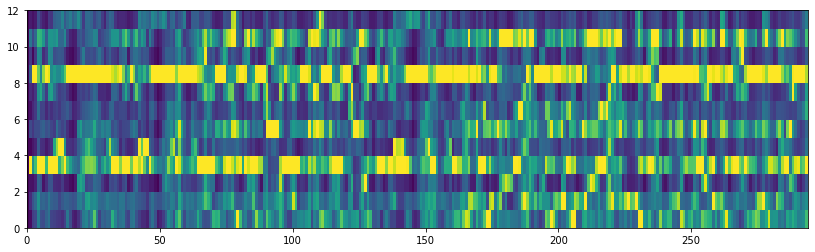

In [22]:
#Extract information from the annotations
tuning, beats, chords = ann.info_json('../json/maple_leaf_rag(hyman).json')
root, jazz5 = ann.root_jazz5_list(chords)

#Chroma extraction
hpcp_chroma = aud.compute_HPCP('../sounds/maple_leaf_rag(hyman).flac',
                               beats,
                               tuning_frequency=tuning,
                               beatsperframe=2,
                               framesize=16384,
                               hopsize=8192)

fig, ax = plt.subplots(figsize=(14,4))
ax.pcolormesh(np.transpose(hpcp_chroma))

### Global chordiogram

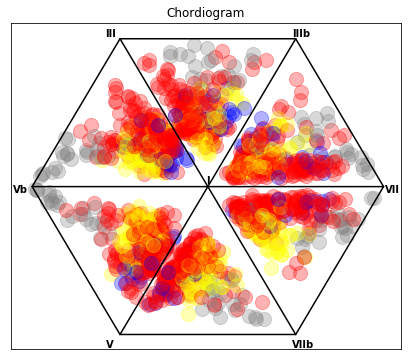

In [23]:
def chordiogram(chromagram, gt_root, gt_jazz5):
    fig, ax = plt.subplots(figsize=(7,6))
    hexagram.init_hexagram(ax, 'Chordiogram')
    
    jazz5_color = {'maj':'red',
                   'min':'blue',
                   'dom':'yellow',
                   'hdim':'green',
                   'dim':'grey',
                   'unclassified':'lightgrey'}
    for i in range(min(len(chromagram),len(gt_root))):
        if gt_jazz5[i] != 'N':
            color = jazz5_color[gt_jazz5[i]]
            hexagram.plot_chord(ax, chromagram[i], gt_root[i], color)

    return ax

global_chordiogram = chordiogram(hpcp_chroma, root, jazz5)

Clear patterns can be identified. It is observed that :
- maj (red) : fits a balance between I (at the center), III, V and sometimes VII
- min (blue) : has few samples in the studied track, but balances I and V, and favours IIIb rather than III
- dom (yellow) : fits the major third (I-III) and is closer to VIIb than maj
- dim (grey) : can be clearly distinguished by its strong Vb degree

For better reading, chords can be plotted separately :

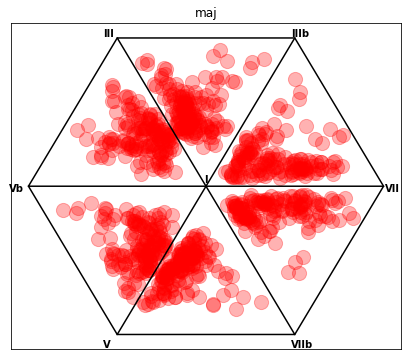

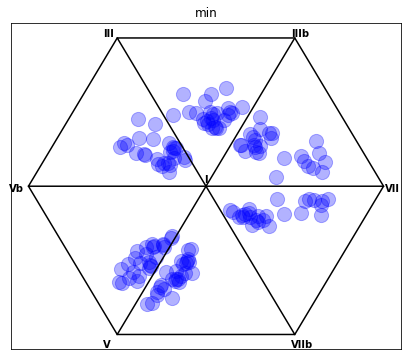

In [24]:
def partial_chordiogram(chromagram, gt_root, gt_jazz5, target_j5):
    fig, ax = plt.subplots(figsize=(7,6))
    hexagram.init_hexagram(ax, target_j5)
    
    jazz5_color = {'maj':'red',
                   'min':'blue',
                   'dom':'yellow',
                   'hdim':'green',
                   'dim':'grey',
                   'unclassified':'lightgrey'}
    color = jazz5_color[target_j5]
    for i in range(min(len(chromagram),len(gt_root))):
        if gt_jazz5[i] == target_j5:
            hexagram.plot_chord(ax, chromagram[i], gt_root[i], color)

    return ax


maj_chordiogram = partial_chordiogram(hpcp_chroma, root, jazz5, 'maj')
min_chordiogram = partial_chordiogram(hpcp_chroma, root, jazz5, 'min')

The following chordiograms are obtained in building them with the whole JAAH dataset :

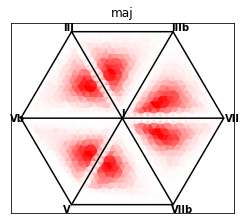

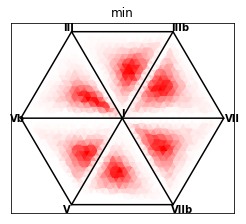

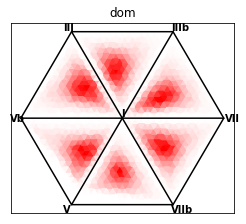

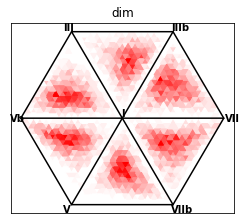

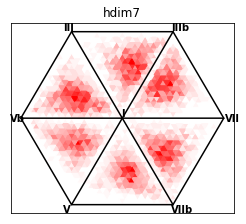

In [25]:
model_highresol = data_demo.model_resol4
discretemodel.print_model(model_highresol)